<a href="https://colab.research.google.com/github/18K41A0432preethi/NNDL1/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv("/content/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
z=np.abs(stats.zscore(data['price']))
print(z)

[0.86671733 0.00568792 0.98084935 ... 0.37586519 0.38158814 0.58588173]


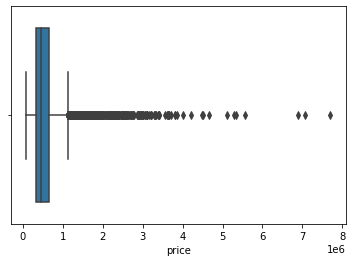

In [5]:
sns.boxplot(x=data['price'])

In [6]:
df=pd.DataFrame(data=data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
x=df
df.drop(['date'],axis=1)
for i in df:
  if i!='date':
    q=df[i].quantile(0.99)
    df[df[i]<q]
    q_low=df[i].quantile(0.01)
    q_hi=df[i].quantile(0.99)
    df_filtered=df[(df[i]<q_hi)&(df[i]>q_low)]
df_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(len(df))
print(len(df_filtered))
if(len(df)==len(df_filtered)):
  print('No outliers')
data=df_filtered

21613
21178


In [9]:
data_n=data.copy()
for i in data:
  if i!='date':
    data_n[i]=data[i].copy()
    data_n[i]=(data_n[i]-data_n[i].min())/(data_n[i].max()-data_n[i].min())
data_n.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.075680,0.004338,0.0,0.0,0.0,0.5,0.500000,0.103851,0.000000,0.478261,0.000000,0.893939,0.571498,0.215000,0.153043,0.028583
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.193878,0.005705,0.4,0.0,0.0,0.5,0.500000,0.219370,0.082988,0.443478,0.988089,0.626263,0.908959,0.163333,0.213913,0.041339
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.040816,0.008074,0.0,0.0,0.0,0.5,0.416667,0.056009,0.000000,0.286957,0.000000,0.136364,0.936143,0.235000,0.393043,0.044052
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.142007,0.003779,0.0,0.0,0.0,1.0,0.500000,0.088681,0.188797,0.565217,0.000000,0.681818,0.586939,0.101667,0.156522,0.024415
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.118197,0.006425,0.0,0.0,0.0,0.5,0.583333,0.162194,0.000000,0.756522,0.000000,0.368687,0.741354,0.391667,0.233043,0.040467


In [10]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [11]:
print(len(train_data))
train_data.head()

19060


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21287,0.012330,20140502T000000,0.072131,0.121212,0.40625,0.207483,0.045881,0.0,0.0,0.0,0.50,0.666667,0.148191,0.242739,0.930435,0.0,0.292929,0.574875,0.337500,0.394783,0.705964
6916,0.945358,20150414T000000,0.169836,0.151515,0.28125,0.273810,0.011375,0.0,0.0,0.5,0.50,0.583333,0.182030,0.344398,0.513043,0.0,0.196970,0.684896,0.224167,0.386087,0.048464
17523,0.407112,20140610T000000,0.016328,0.090909,0.12500,0.053571,0.007913,0.0,0.0,0.0,0.75,0.500000,0.073512,0.000000,0.539130,0.0,0.000000,0.225028,0.192500,0.126609,0.055275
16395,0.727178,20140721T000000,0.037574,0.090909,0.21875,0.066327,0.007215,0.0,0.0,0.0,0.75,0.500000,0.091015,0.000000,0.678261,0.0,0.257576,0.872607,0.319167,0.215652,0.046219
14444,0.690949,20141110T000000,0.067934,0.151515,0.31250,0.199830,0.003264,0.2,0.0,0.0,1.00,0.500000,0.180863,0.165975,0.217391,0.0,0.611111,0.722374,0.179167,0.219130,0.020567


In [12]:
x=np.array(train_data['sqft_living'])
y=np.array(train_data['price'])

In [13]:
#Initialise values
bs=2
m=1.0 
c=-1.0  
eta=0.1      #Learning rate
max_iters=100 #Maximum iterations
ns=len(x)
nb=ns//bs
ms=ns%bs
err=[]
k=nb
if(ms>0):
  error=0
  gm=0
  gc=0
  for j in range(0,ms):
    error+=((y[j]-(m*x[j])-c))**2
    index=k*bs + j
    gm=gm+((-1.0)*((y[index]-m*x[index]-c)*x[index]))
    gc=gc+((-1.0)*(y[index]-m*x[index]-c))
  gm=gm/ms
  gc=gc/ms
  #find change in m , c
  dm=(-1.0)*eta*gm
  dc=(-1.0)*eta*gc
  #update variable 
  m=m+dm 
  c=c+dc
  error=(1/(2*len(train_data['sqft_living'])))*(error)
  err.append(error)
else:
  for i in range(0,max_iters):
    for k in range(0,nb):
      error=0
      gm=0
      gc=0
      for j in range(0,bs):
        error+=((y[j]-(m*x[j])-c))**2
        index=k*bs + j
        gm=gm+((-1.0)*((y[index]-m*x[index]-c)*x[index]))
        gc=gc+((-1.0)*(y[index]-m*x[index]-c))
      gm=gm/bs
      gc=gc/bs
      #find change in m,c
      dm=(-1.0)*eta*gm
      dc=(-1.0)*eta*gc
      #update variable 
      m=m+dm 
      c=c+dc
      error=(1/(2*len(train_data['sqft_living'])))*(error)
      err.append(error)
#print variable m, c
m=round(m,2)
c=round(c,2)
print("Minimum value obtained at m = {} ,c ={} for given function ".format(m,c))

Minimum value obtained at m = 0.43 ,c =-0.01 for given function 


In [14]:
train_data_pred = [i for i in x]
for k in range(len(x)):
    train_data_pred[k]=(m*x[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,train_data_pred)
print("Mean Square Error for training data (MSE) : ",mse)
print("Root Mean Square Error for traning data (RMSE):",mse**0.5)

Mean Square Error for training data (MSE) :  0.0012175739656565424
Root Mean Square Error for traning data (RMSE): 0.034893752530453674


Text(0.5, 1.0, 'predicted data vs actual data')

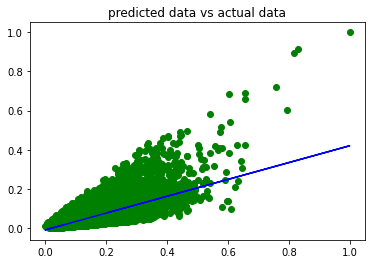

In [16]:
plt.plot(np.array(train_data['sqft_living']),np.array(train_data_pred),'blue')
plt.scatter(np.array(train_data['sqft_living']),np.array(train_data['price']),color='green')
plt.title('predicted data vs actual data')

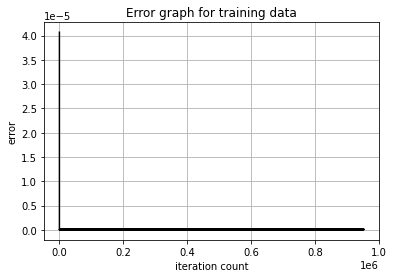

In [18]:
iters = np.arange(max_iters*nb)
plt.plot(iters,err,'black')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

In [19]:
x = np.array(test_data['sqft_living'])
y = np.array(test_data['price'])

test_data_pred = [i for i in x]
for k in range(len(x)):
    test_data_pred[k]=(m*x[k] + c)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,test_data_pred)
print("Mean Square Error for testing data (MSE) : ",mse)
print("Root Mean Square Error for testing data (RMSE):",mse**0.5)

Mean Square Error for testing data (MSE) :  0.0012073480659704385
Root Mean Square Error for testing data (RMSE): 0.034746914481295146


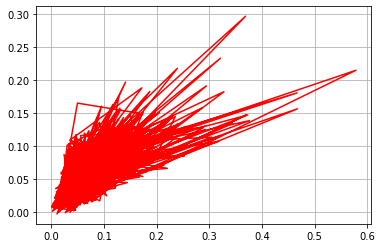

In [21]:
plt.plot(test_data['price'],test_data_pred,'red')
plt.grid()

In [22]:
x_min = data['sqft_living'].min()
x_max = data['sqft_living'].max()
y_min = data['price'].min()
y_max = data['price'].max()

In [23]:
x1 = float(input("enter squareroot feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :"))
x1 = (x1 - x_min)/(x_max - x_min)
y = m*x1+c
y = y*(y_max - y_min) + y_min
print(f"price  is : {y}")

enter squareroot feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :3000
price  is : 754312.287414966
